<a href="https://colab.research.google.com/github/bonareri/Machine-Learning/blob/main/Plant_disease_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Depencies

In [20]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

## Data Curation

In [5]:
!pip install kaggle

In [7]:
kaggle_credentials  = json.load(open("kaggle.json"))

In [8]:
#setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [9]:
!kaggle datasets download  -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.03G/2.04G [00:21<00:00, 74.4MB/s]
100% 2.04G/2.04G [00:21<00:00, 104MB/s] 


In [10]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [11]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [12]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['grayscale', 'segmented', 'color']
38
['Corn_(maize)___Common_rust_', 'Potato___Late_blight', 'Tomato___Target_Spot', 'Raspberry___healthy', 'Potato___Early_blight']
38
['Corn_(maize)___Common_rust_', 'Potato___Late_blight', 'Tomato___Target_Spot', 'Raspberry___healthy', 'Potato___Early_blight']
38
['Corn_(maize)___Common_rust_', 'Potato___Late_blight', 'Tomato___Target_Spot', 'Raspberry___healthy', 'Potato___Early_blight']


In [13]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['8c3b791e-e2e5-4f3b-8183-610458658926___Mt.N.V_HL 8982.JPG', '4abb1e67-c8e6-4313-a9e5-119fe08b4be3___Mt.N.V_HL 9029.JPG', '31a167ba-d110-4fd4-ba34-f9afd27d0f21___Mt.N.V_HL 6140.JPG', '66b4364e-f8c7-4358-96e4-1d8012830b40___Mt.N.V_HL 6087.JPG', '3212eeb2-e75c-45a3-9211-6147cd370274___Mt.N.V_HL 6041.JPG']


## Data Preprocessing

In [14]:
# Dataset path and parameters
base_dir = "plantvillage dataset/color"
img_size = 224
batch_size = 32

(256, 256, 3)


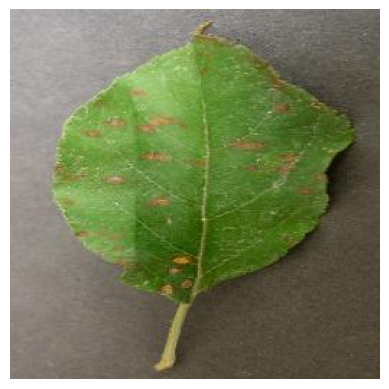

In [15]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

## Train-Test Split

In [16]:
# Image data generator with data augmentation
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Set aside 20% for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [17]:
# Train and validation generators
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical',
    shuffle=True
)

Found 43456 images belonging to 38 classes.


In [18]:
#Validator Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical',
    shuffle=True
)

Found 10849 images belonging to 38 classes.


In [21]:
# Calculate steps per epoch
steps_per_epoch = math.ceil(train_generator.samples / batch_size)
validation_steps = math.ceil(validation_generator.samples / batch_size)

In [22]:
# Display the calculated steps
print(f"Steps per epoch (training): {steps_per_epoch}")
print(f"Steps per epoch (validation): {validation_steps}")

Steps per epoch (training): 1358
Steps per epoch (validation): 340


## Convolutional Neural Network

In [23]:
# Model definition
model = Sequential([
    # Convolutional Layer
        Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Second Convolutional Layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Third Convolutional Layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Flatten Layer
    Flatten(),

    # Fully Connected Layer
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Output Layer
    Dense(train_generator.num_classes, activation='softmax')
])

# Model Summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,173,862 (42.62 MB)

 Trainable params: 11,173,862 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
#compile model
model.compile(
    loss='categorical_crossentropy',  # Use categorical crossentropy for multi-class classification
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Adam optimizer
    metrics=['accuracy']  # Evaluate the model using accuracy
)

## Model Training

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=5,  # No.of epochs
    validation_data=validation_generator,
    validation_steps=validation_steps
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 197/1358 ━━━━━━━━━━━━━━━━━━━━ 1:29:52 5s/step - accuracy: 0.1064 - loss: 3.8810

## Model Evaluation

In [23]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.8639 - loss: 0.6185
Validation Accuracy: 86.76%


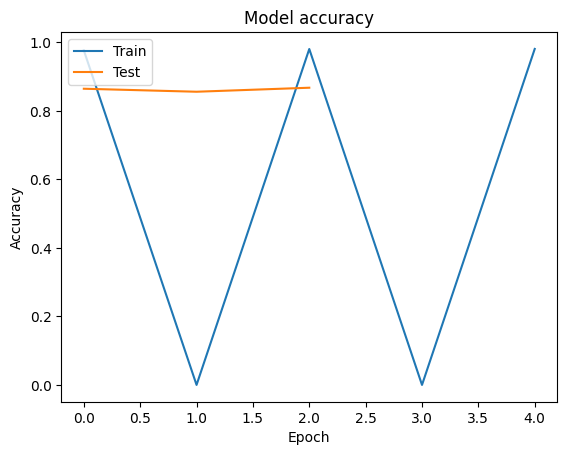

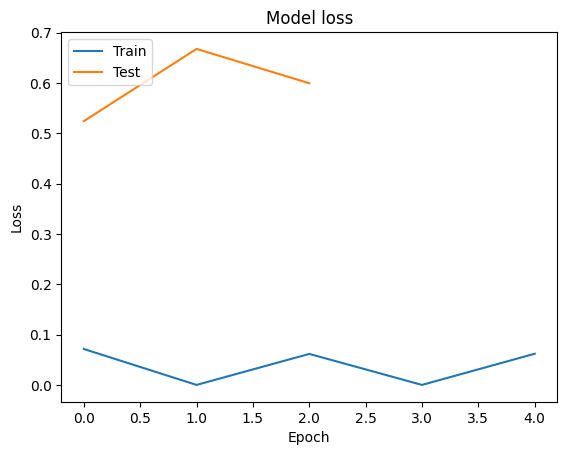

In [24]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Building a Predictive Model

In [25]:
#Function to load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224,224)):
    #load image
    img = Image.open(image_path)
    #resize image
    img = img.resize((img_size, img_size))
    # convert image to a numpy array
    img_array = np.array(img)
    #add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.0
    return img_array

#Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_image = load_and_preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [26]:
#Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [27]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [28]:
#saving the class name as json file
json.dump(class_indices, open("class_indices.json", "w"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The predicted class is: Tomato___Late_blight


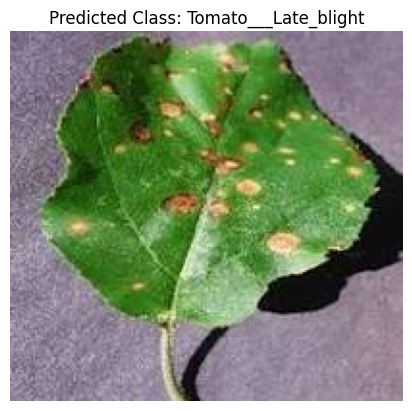

In [33]:
# Function to display the image and the prediction
def show_image_with_prediction(image_path, predicted_class_name):
    # Load the image
    img = mpimg.imread(image_path)

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off the axes
    plt.title(f"Predicted Class: {predicted_class_name}")
    plt.show()

# Example usage
image_path = '/content/Apple_black_rot.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)
print(f"The predicted class is: {predicted_class_name}")

# Show the image with the prediction
show_image_with_prediction(image_path, predicted_class_name)


## Saving the Model

In [ ]:
model.save('drive')